<a href="https://colab.research.google.com/github/SushieeK/Data-Science-Assignments/blob/main/Social_media_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social media analysis

Project by Susmitha Kusuma (sk10689), Please add ID's here

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
from google.colab import files

In [3]:
! pip install kaggle

In [4]:
files.upload()  # Choose the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"susmithakusuma","key":"a8994b2c4c78267a9be4db1442156892"}'}

In [5]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)  # Create a directory for Kaggle
!cp kaggle.json /root/.kaggle/  # Move the kaggle.json file to the .kaggle directory
!chmod 600 /root/.kaggle/kaggle.json  # Set permissions to secure the file


In [6]:
!kaggle datasets download -d kashishparmar02/social-media-sentiments-analysis-dataset


Dataset URL: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
License(s): CC0-1.0
  0% 0.00/50.9k [00:00<?, ?B/s]
100% 50.9k/50.9k [00:00<00:00, 37.0MB/s]


In [7]:
!unzip social-media-sentiments-analysis-dataset.zip -d /content


Archive:  social-media-sentiments-analysis-dataset.zip
  inflating: /content/sentimentdataset.csv  


In [8]:
!ls /content


kaggle.json  sample_data  sentimentdataset.csv	social-media-sentiments-analysis-dataset.zip


In [10]:
df = pd.read_csv('/content/sentimentdataset.csv')


In [11]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [12]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [13]:
df.shape

(732, 15)

In [14]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [17]:
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

In [18]:
df["Retweets"] = df["Retweets"].astype(int)
df["Likes"] = df["Likes"].astype(int)

In [19]:
df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"],axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    int64         
 7   Likes      732 non-null    int64         
 8   Country    732 non-null    object        
 9   Year       732 non-null    int32         
 10  Month      732 non-null    int32         
 11  Day        732 non-null    int32         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(6)
memory usage: 65.9+ KB


In [21]:
df.isnull().sum().sum()

0

In [22]:
df.duplicated().value_counts()

,count
False,710
True,22


In [23]:
df.describe()


,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [24]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


# Analytics

In [25]:
df.columns


Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [26]:
sten = df["Sentiment"].value_counts().head(10).reset_index()
sentiment = pd.DataFrame(sten)
sentiment

,Sentiment,count
0,Positive,45
1,Joy,44
2,Excitement,37
3,Contentment,19
4,Neutral,18
5,Gratitude,18
6,Curiosity,16
7,Serenity,15
8,Happy,14
9,Nostalgia,11


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

Distribution among Platforms


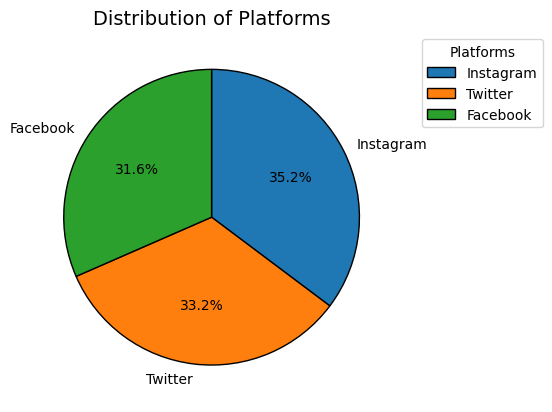

In [28]:
df['Platform'].value_counts().plot.pie(
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    startangle=90,
    counterclock=False,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)

# Adding a title and legend
plt.title('Distribution of Platforms', fontsize=14)
plt.ylabel('')  # Hide the default y-label
plt.legend(title='Platforms', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Sentiment Distribution

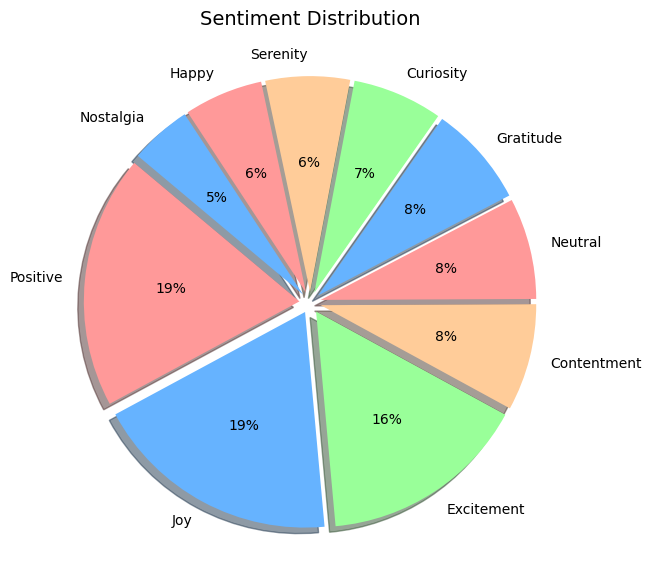

In [31]:
plt.figure(figsize=(9, 7))

# Plot the pie chart with additional customizations
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Add custom colors for wedges
explode = [0.05] * len(sentiment["Sentiment"])  # Explode all wedges slightly for emphasis

plt.pie(
    sentiment["count"],
    labels=sentiment["Sentiment"],
    autopct=lambda p: '{:.0f}%'.format(p) if p > 0 else '',  # Custom autopct formatting
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140  # Start angle for different orientation
)

# Display the chart
plt.title('Sentiment Distribution', fontsize=14)  # Add a title with font size
plt.show()

Hashtags

In [35]:
k = df["Hashtags"].value_counts().head(10).reset_index()
Hash = pd.DataFrame(k)
Hash

,Hashtags,count
0,#Playful #CarnivalEscapade,3
1,#Hopeful #SeedsOfOptimism,3
2,#Proud #ScalingPeaks,3
3,#Compassionate #TearsOfEmpathy,3
4,#Numbness #EmotionalShield,2
5,#Acceptance #LifeJourney,2
6,#Curiosity #AncientMysteries,2
7,#Frustrated #MosaicOfDisappointment,2
8,#Confusion #ThoughtLabyrinth,2
9,#Inspired #TalesToTheStars,2


from matplotlib import pyplot as plt
Hash['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Hash['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

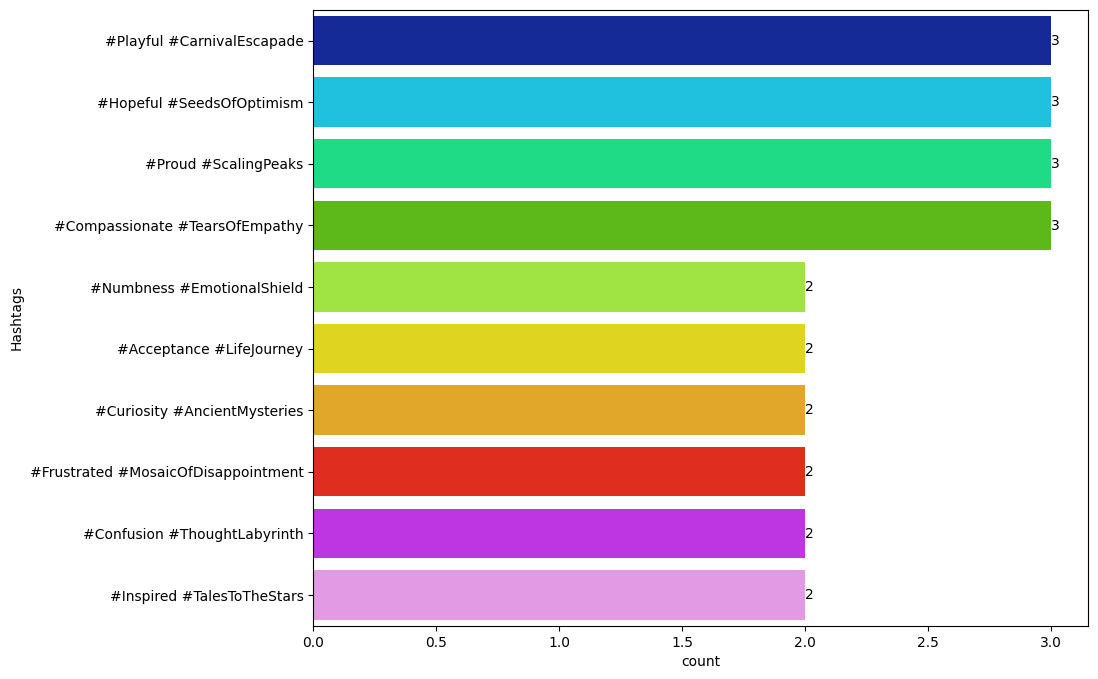

In [36]:
plt.figure(figsize = (10,8))
k = sns.barplot(y = "Hashtags", x = "count", data = Hash, palette = "gist_ncar")
for bars in k.containers:
    k.bar_label(bars)
plt.show()

Top 10 Re-Tweeted Hashtags

In [37]:
k = df.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Retweets
0,#Anticipation #AdventureAwaits,40
1,#Despair #AbyssOfHeartache,40
2,#Disappointment #SoccerDefeats,40
3,#Elation #RareBookDiscovery,40
4,#Emotion #AdeleConcert,40
5,#Enthusiasm #JustinBieber,40
6,#Excitement #MoviePremiereThrills,40
7,#Joy #EndlessSmiles,40
8,#Joy #SimpleMoments,40
9,#Joy #WorldCupTriumph,40


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Retweets']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Retweets'}, axis=1)
              .sort_values('Retweets', ascending=True))
  xs = counted['Retweets']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = b.sort_values('Retweets', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Retweets')
_ = plt.ylabel('count()')

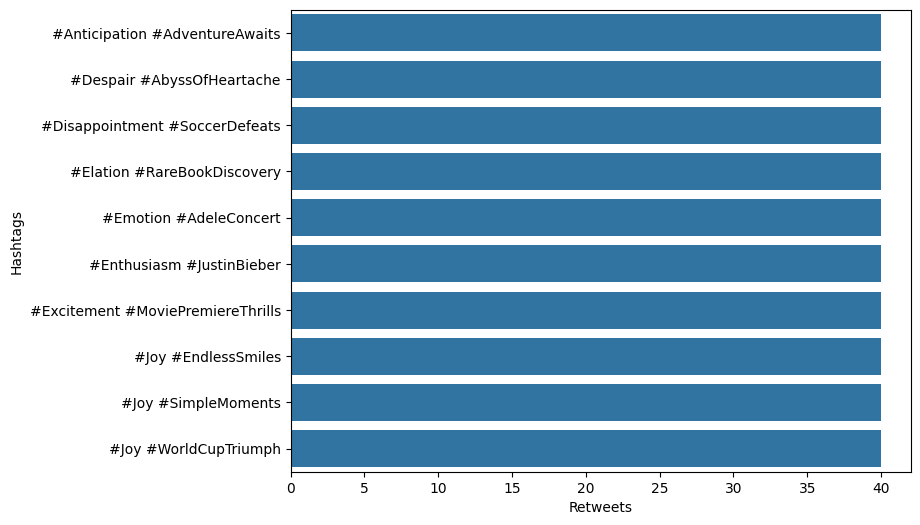

In [38]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = b)
plt.show()

Top 10 liked Hashtags

In [39]:
k = df.groupby("Hashtags")["Likes"].max().nlargest(10).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Likes
0,#Anticipation #AdventureAwaits,80
1,#Despair #AbyssOfHeartache,80
2,#Disappointment #SoccerDefeats,80
3,#Elation #RareBookDiscovery,80
4,#Emotion #AdeleConcert,80
5,#Enthusiasm #JustinBieber,80
6,#Excitement #MoviePremiereThrills,80
7,#Joy #EndlessSmiles,80
8,#Joy #SimpleMoments,80
9,#Joy #WorldCupTriumph,80


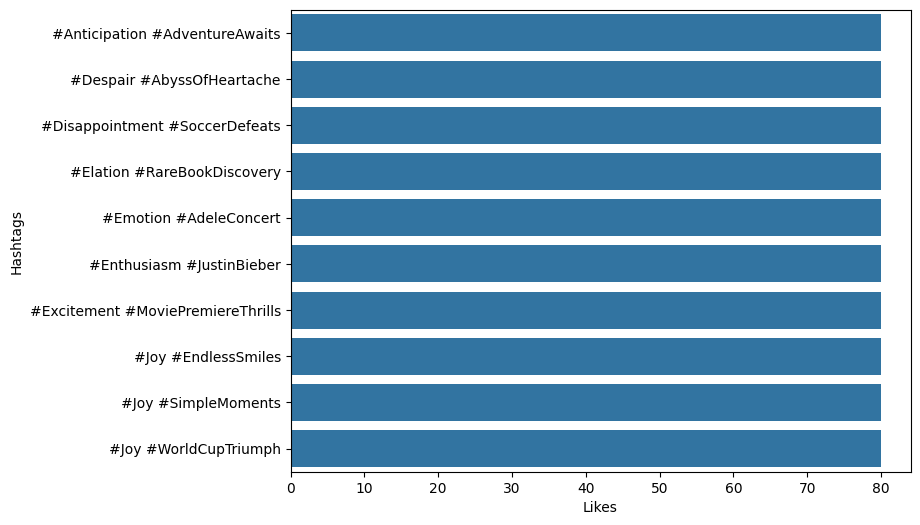

In [40]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "Hashtags", data = b)
plt.show()

Likes Per Year

In [41]:
k = df.groupby('Year')['Likes'].sum().reset_index()
ly = pd.DataFrame(k)
ly

,Year,Likes
0,2010,160
1,2011,185
2,2012,160
3,2013,175
4,2014,160
5,2015,859
6,2016,1661
7,2017,1785
8,2018,2505
9,2019,3224


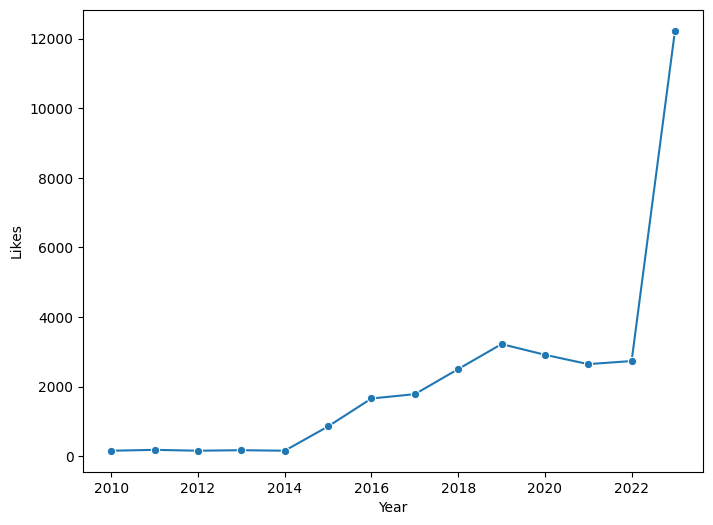

In [42]:
plt.figure(figsize = (8,6))
sns.lineplot(x = "Year", y = "Likes", data = ly, marker = "o")
plt.show()

Total Likes for Top 10 Sentiments

In [43]:
k = df.groupby("Sentiment")["Likes"].sum().nlargest(10).reset_index()
k = pd.DataFrame(k)
k

,Sentiment,Likes
0,Joy,2168
1,Excitement,1860
2,Positive,1700
3,Contentment,976
4,Gratitude,885
5,Neutral,729
6,Curiosity,688
7,Serenity,636
8,Happy,632
9,Awe,400


from matplotlib import pyplot as plt
k['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
k['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

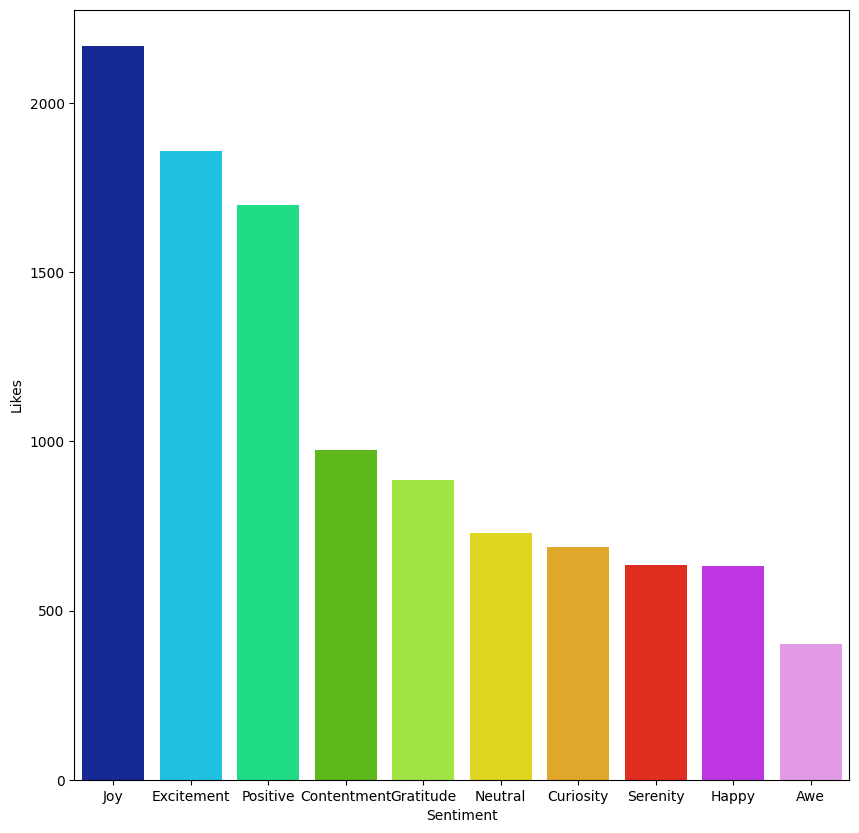

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Sentiment",y = "Likes",data= k ,palette="gist_ncar",)
plt.show()

Likes per each Hour

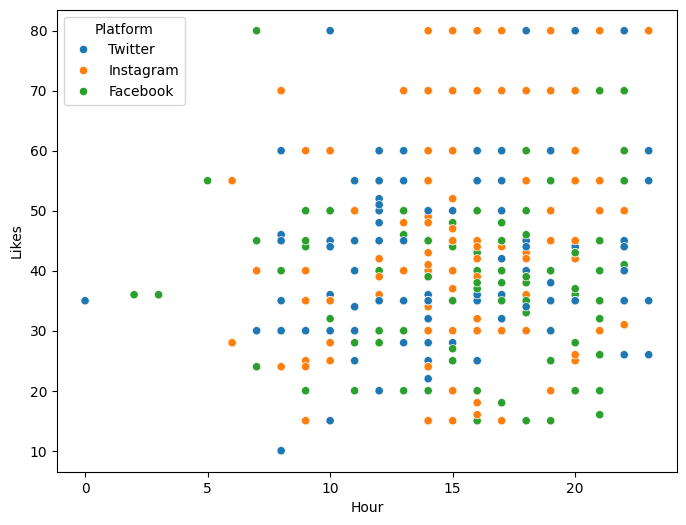

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'Hour', y = 'Likes',hue = "Platform")
plt.show()

Country wise Distribution of user

,Country,count
0,USA,188
1,UK,143
2,Canada,135
3,Australia,75
4,India,70
5,Brazil,17
6,France,16
7,Japan,15
8,Germany,14
9,Italy,11


from matplotlib import pyplot as plt
b['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
b['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

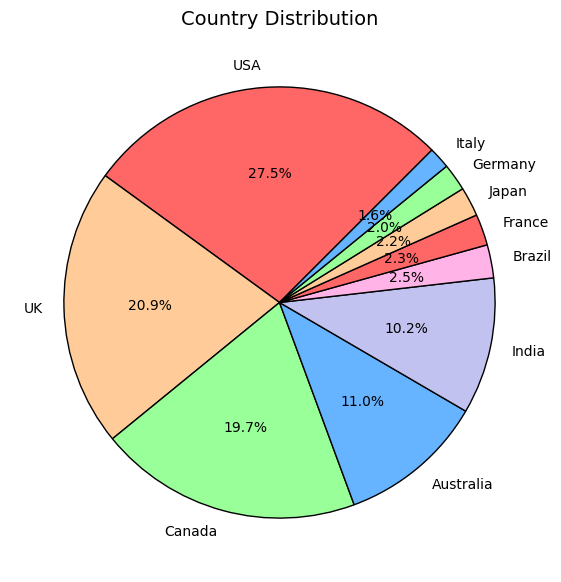

In [47]:
plt.figure(figsize=(11, 7))


colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0', '#ffb3e6']
plt.pie(
    b["count"],
    labels=b["Country"],
    autopct='%1.1f%%',
    colors=colors,  # Apply custom colors
    startangle=45,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# Add a title to the pie chart
plt.title("Country Distribution", fontsize=14)
plt.show()

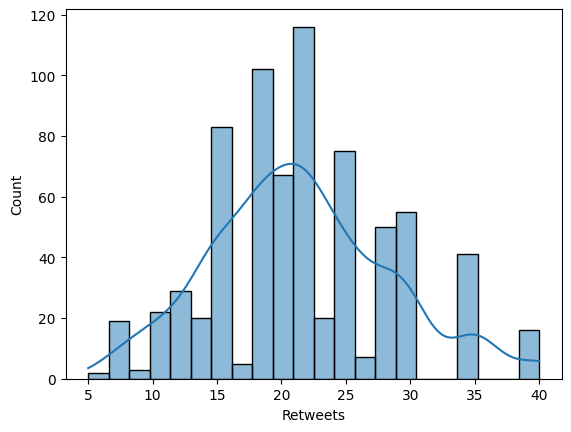

In [48]:
sns.histplot(df.Retweets,kde = True)
plt.show()

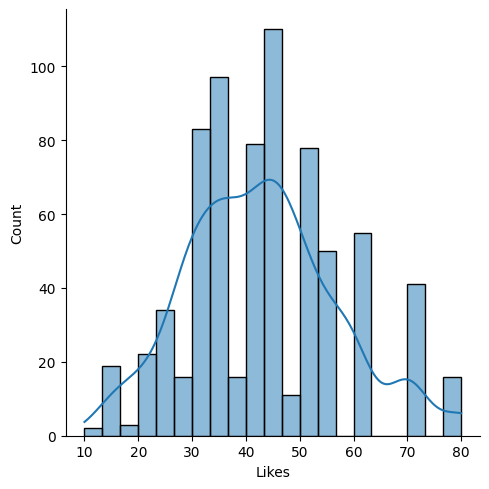

In [49]:
sns.displot(df.Likes,kde = True)
plt.show()

Top 10 Re-Tweeted texts

In [50]:
k = df.groupby("Text")["Retweets"].sum().nlargest(10)
tophash = pd.DataFrame(k)
tophash

,Retweets
Text,
"A playful escapade in the carnival of life, carousel laughter and cotton candy dreams swirling in the joyous atmosphere.",72
"Proudly scaling the peaks of achievement, a mountaineer conquering challenges and planting the flag of success.",69
"A compassionate rain, tears of empathy falling gently, nurturing the seeds of kindness in the garden of human connections.",63
Savoring the warmth of a cup of cocoa on a chilly winter evening.,60
Whispers of inspiration from the rustling leaves in a serene forest.,56
"Playfully juggling responsibilities, a circus performer balancing the acts of work and joy, tossing laughter into the air.",50
"Confident strides in the dance of life, a ballroom where self-assuredness leads, twirling through challenges with grace.",46
"A free spirit soaring on the wings of dreams, leaving trails of independence in the azure sky of boundless possibilities.",44
Heartfelt gratitude for the laughter shared during a family reunion.,44


Top 10 liked text

In [51]:
k = df.groupby("Text")["Likes"].sum().nlargest(10)
toplike = pd.DataFrame(k)
toplike

,Likes
Text,
"A playful escapade in the carnival of life, carousel laughter and cotton candy dreams swirling in the joyous atmosphere.",144
"Proudly scaling the peaks of achievement, a mountaineer conquering challenges and planting the flag of success.",138
"A compassionate rain, tears of empathy falling gently, nurturing the seeds of kindness in the garden of human connections.",126
Savoring the warmth of a cup of cocoa on a chilly winter evening.,120
Whispers of inspiration from the rustling leaves in a serene forest.,110
"Playfully juggling responsibilities, a circus performer balancing the acts of work and joy, tossing laughter into the air.",100
"Confident strides in the dance of life, a ballroom where self-assuredness leads, twirling through challenges with grace.",92
Heartfelt gratitude for the laughter shared during a family reunion.,90
"A free spirit soaring on the wings of dreams, leaving trails of independence in the azure sky of boundless possibilities.",88
